# Impact of Hidden Layer Size on Neural Networks 

## Setting up: Install required packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from scipy import interp

from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import *

### Read the data file

In [2]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",
                  names=["Sex","Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"])

# Exploratory data analysis(EDA)

### Attribute information:

#### Predictor variables: 
* Length      
* Diameter    
* Height      
* Whole weight 
* Shucked weight
* Viscera weight 
* Shell weight 
* Rings 

#### Response variable:

* Sex 



### Check the dimension and data type of the data set

In [3]:
print(df.shape)

(4177, 9)


In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [5]:
df.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

### Summary statistics before standardization

In [6]:
summary=df.describe().transpose()
print(summary)

                 count      mean       std     min     25%     50%     75%  \
Length          4177.0  0.523992  0.120093  0.0750  0.4500  0.5450   0.615   
Diameter        4177.0  0.407881  0.099240  0.0550  0.3500  0.4250   0.480   
Height          4177.0  0.139516  0.041827  0.0000  0.1150  0.1400   0.165   
Whole_weight    4177.0  0.828742  0.490389  0.0020  0.4415  0.7995   1.153   
Shucked_weight  4177.0  0.359367  0.221963  0.0010  0.1860  0.3360   0.502   
Viscera_weight  4177.0  0.180594  0.109614  0.0005  0.0935  0.1710   0.253   
Shell_weight    4177.0  0.238831  0.139203  0.0015  0.1300  0.2340   0.329   
Rings           4177.0  9.933684  3.224169  1.0000  8.0000  9.0000  11.000   

                    max  
Length           0.8150  
Diameter         0.6500  
Height           1.1300  
Whole_weight     2.8255  
Shucked_weight   1.4880  
Viscera_weight   0.7600  
Shell_weight     1.0050  
Rings           29.0000  


Text(0.5, 0.98, 'Visualizing linear relationships among predictor variables before standardization\n')

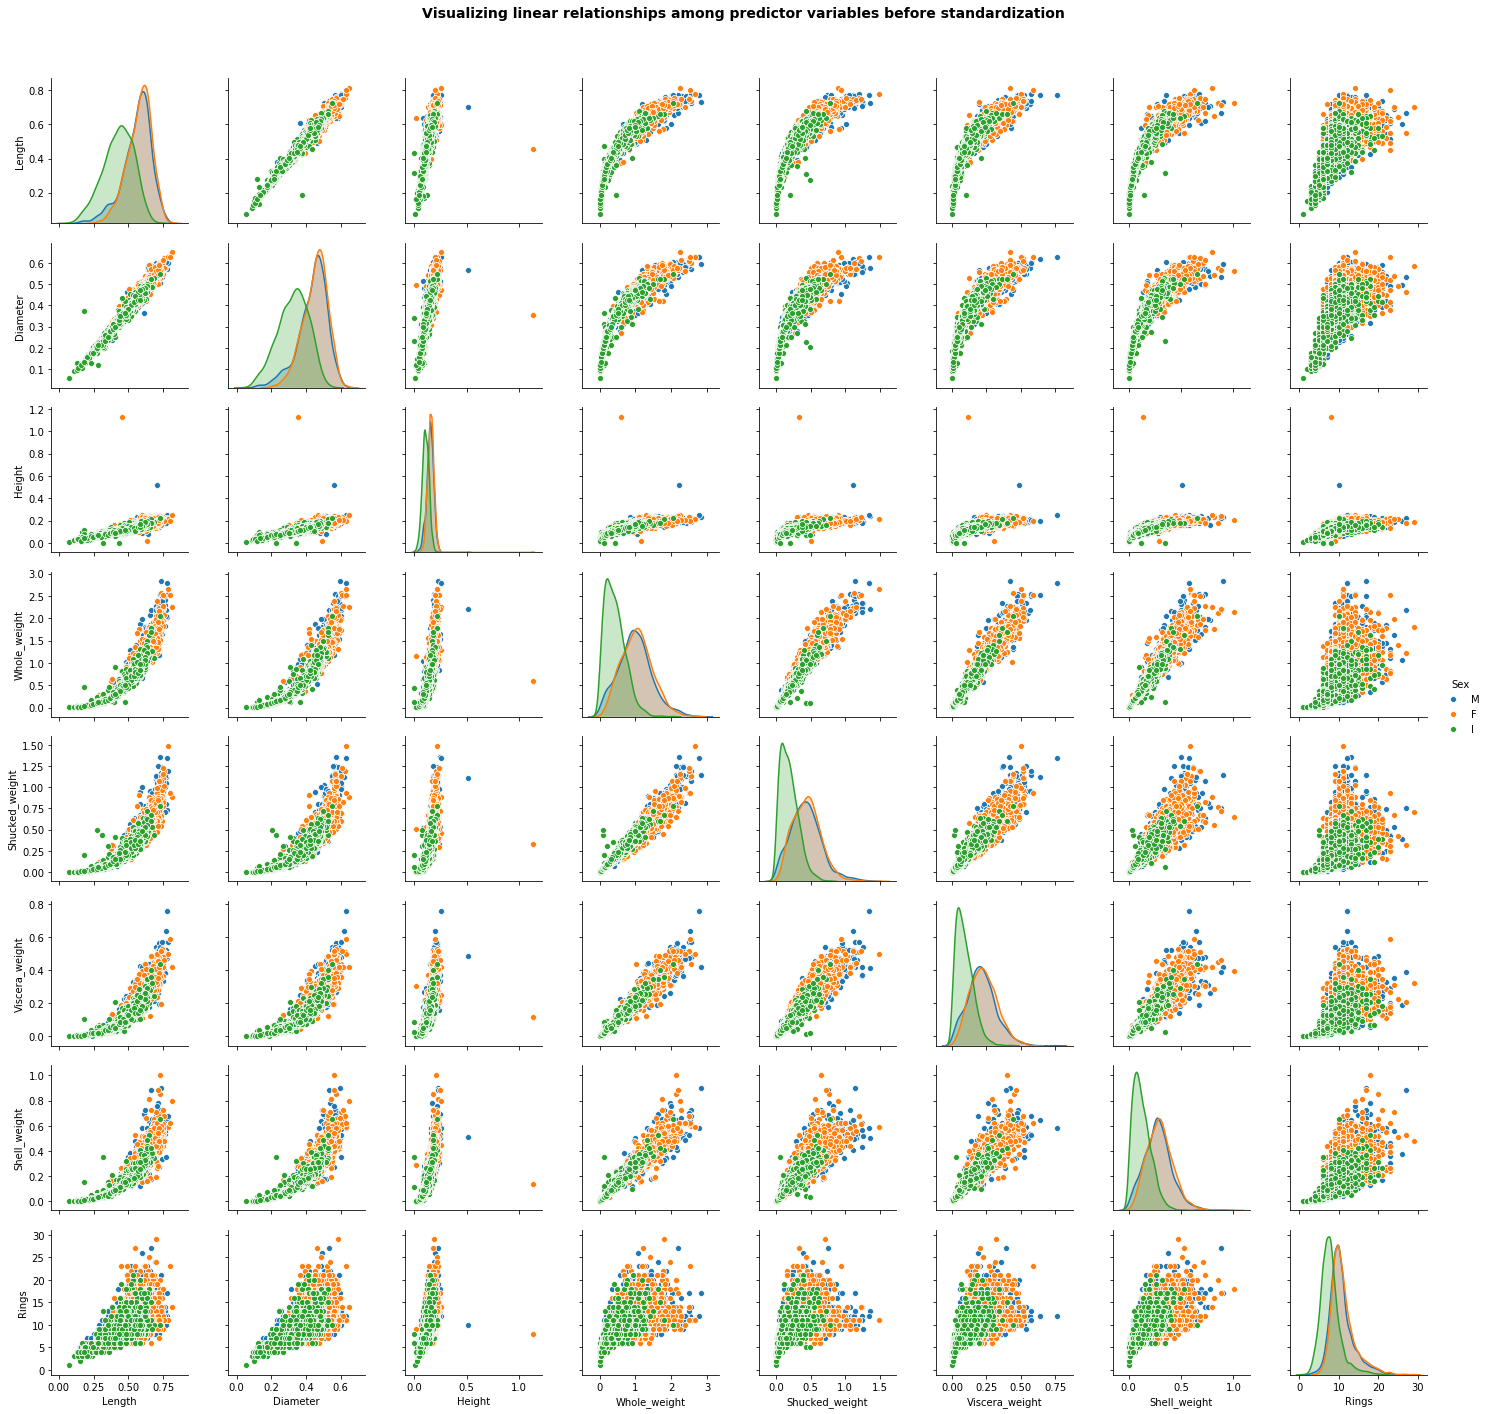

In [7]:
pp=sns.pairplot(df, vars=["Length","Diameter","Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"], hue="Sex")
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Visualizing linear relationships among predictor variables before standardization\n',fontsize=14, fontweight='bold')

## Preprocessing data
### Standardization of the predictor variables using scikit learn MinMax and Normalizer

In [8]:
dfNoI = df[df["Sex"] != 'I']
print("Sexes:", dfNoI.Sex.unique())
print(dfNoI.shape)
print(dfNoI.sample(10))

Sexes: ['M' 'F']
(2835, 9)
     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
3890   M   0.515     0.400   0.140        0.7365          0.2955   
3785   M   0.625     0.495   0.155        1.1770          0.5055   
2933   F   0.615     0.495   0.165        1.1980          0.5415   
3463   M   0.625     0.485   0.170        1.4370          0.5855   
4014   M   0.625     0.480   0.175        1.0650          0.4865   
866    M   0.605     0.455   0.160        1.1035          0.4210   
2744   M   0.480     0.375   0.120        0.5895          0.2535   
2013   M   0.470     0.365   0.135        0.5220          0.2395   
2917   M   0.595     0.460   0.170        1.1295          0.5700   
1675   F   0.610     0.485   0.180        1.2795          0.5735   

      Viscera_weight  Shell_weight  Rings  
3890          0.1840        0.1850     16  
3785          0.2780        0.3450      9  
2933          0.2865        0.3185     10  
3463          0.2930        0.4750     11  
4014

In [9]:
y = pd.DataFrame(dfNoI['Sex'])
X = dfNoI.drop('Sex', axis=1)

In [10]:

min_max_scaler = preprocessing.MinMaxScaler()
XNorm_minmax = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)

XNorm = pd.DataFrame(preprocessing.normalize(X), columns=X.columns)
yDummy = pd.get_dummies(y, drop_first=True)
XNorm.sample(5)

Length  Diameter    Height  Whole_weight  Shucked_weight  \
1595  0.038874  0.031274  0.011107      0.087451        0.033759   
1505  0.039474  0.031809  0.009964      0.058559        0.021155   
1185  0.056699  0.045195  0.016434      0.128928        0.056452   
1051  0.077608  0.062331  0.022610      0.159860        0.066486   
713   0.070731  0.054463  0.019097      0.090889        0.045197   

      Viscera_weight  Shell_weight     Rings  
1595        0.016455      0.027767  0.993760  
1505        0.015023      0.019162  0.996424  
1185        0.030198      0.037799  0.986064  
1051        0.038865      0.046076  0.977738  
713         0.018249      0.021714  0.990231

Text(0.5, 0.98, 'Visualizing linear relationships among predictor variables after normalization\n')

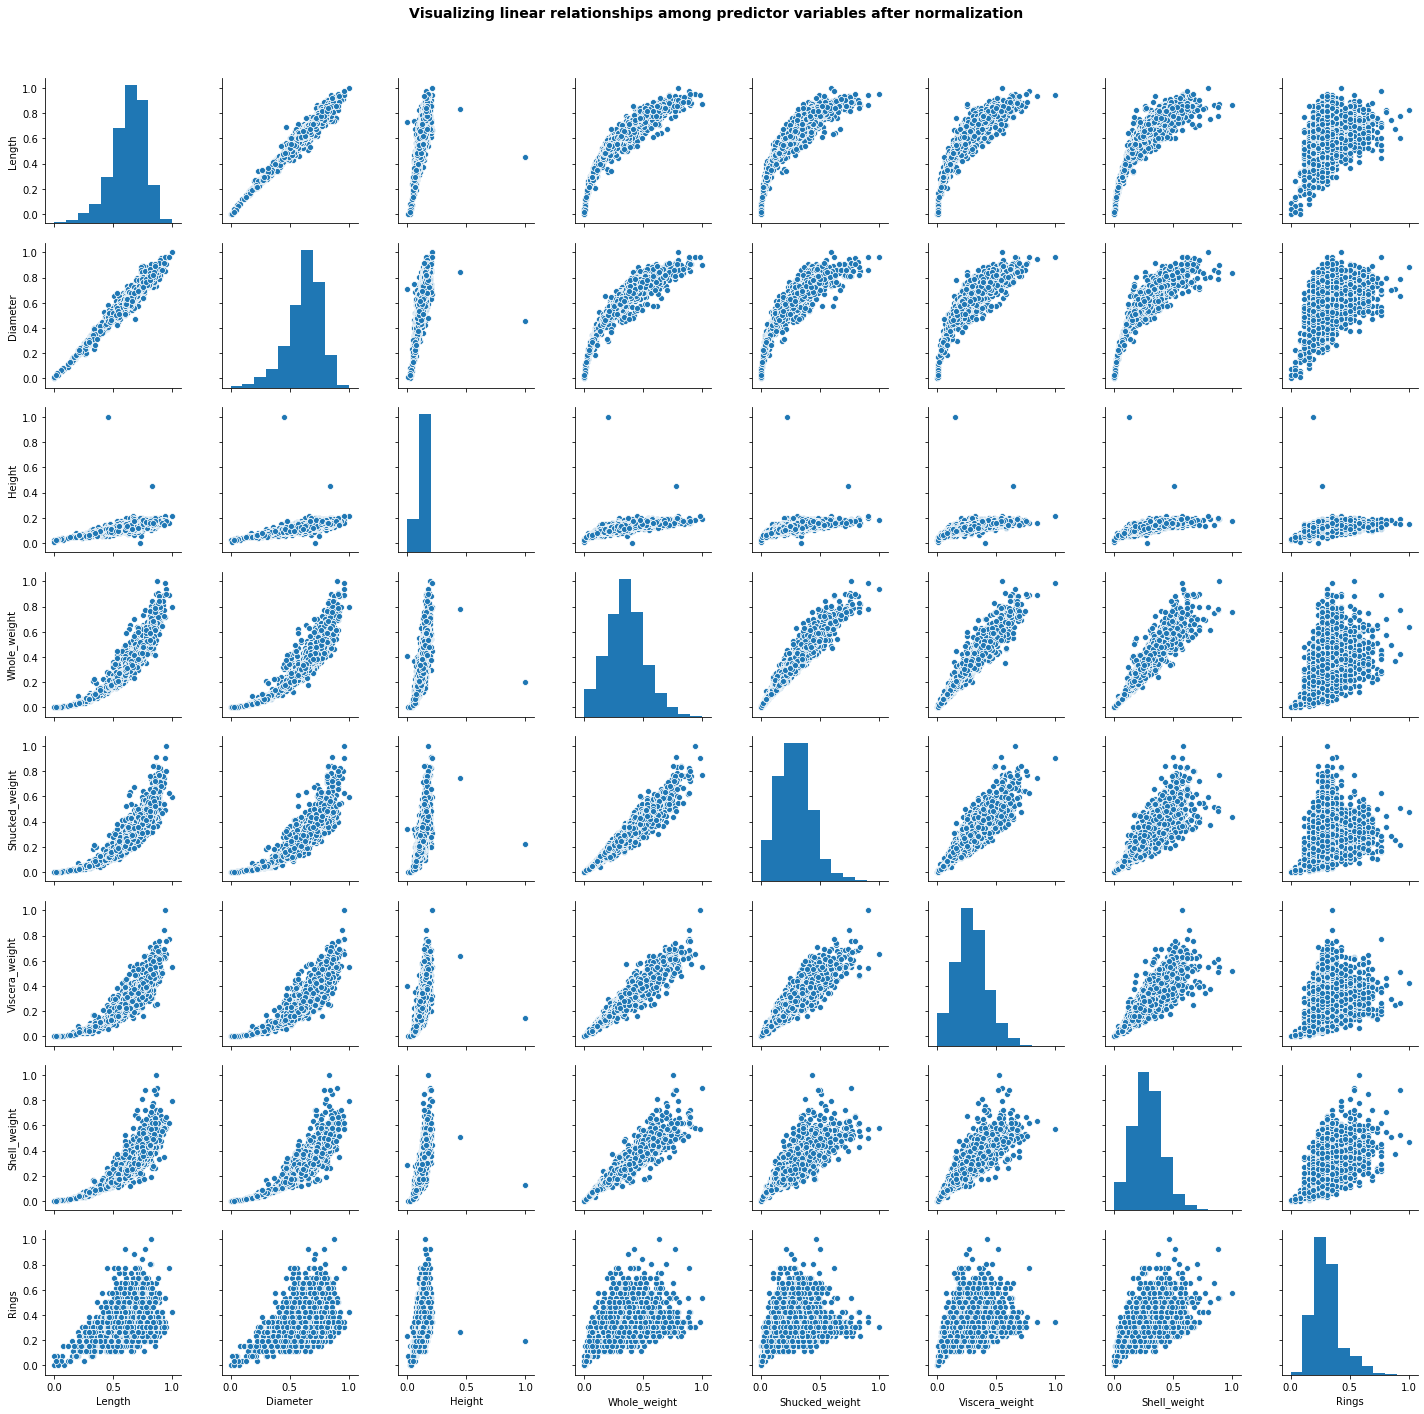

In [11]:
pp=sns.pairplot(XNorm_minmax, vars=["Length","Diameter","Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"])
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Visualizing linear relationships among predictor variables after normalization\n',fontsize=14, fontweight='bold')

### Summary statistics after normalization


In [12]:
summary=XNorm_minmax.describe().transpose()
print(summary)

                 count      mean       std  min       25%       50%       75%  \
Length          2835.0  0.628109  0.145183  0.0  0.545455  0.651515  0.727273   
Diameter        2835.0  0.622977  0.146019  0.0  0.537037  0.648148  0.722222   
Height          2835.0  0.125056  0.033562  0.0  0.107623  0.125561  0.143498   
Whole_weight    2835.0  0.356352  0.161287  0.0  0.244039  0.351423  0.453381   
Shucked_weight  2835.0  0.291968  0.143229  0.0  0.189335  0.286871  0.379514   
Viscera_weight  2835.0  0.289995  0.134584  0.0  0.196830  0.282695  0.375826   
Shell_weight    2835.0  0.286208  0.128835  0.0  0.197500  0.280000  0.360000   
Rings           2835.0  0.303880  0.118048  0.0  0.230769  0.269231  0.346154   

                max  
Length          1.0  
Diameter        1.0  
Height          1.0  
Whole_weight    1.0  
Shucked_weight  1.0  
Viscera_weight  1.0  
Shell_weight    1.0  
Rings           1.0  


### Exploration of dependent(response) and predictor variables

Text(0, 0.5, 'Count')

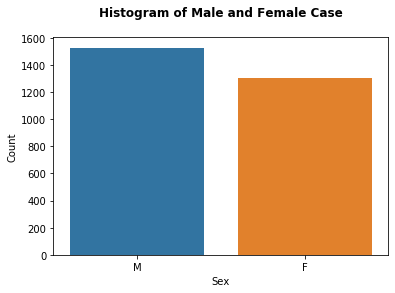

In [13]:
sns.countplot(x='Sex', data=y)
plt.title('Histogram of Male and Female Case\n',fontweight="bold")
plt.xlabel('Sex')
plt.ylabel('Count')

### Exploration of intercorrelated predictor variables

#### Visualize a correlation matrix using seaborn heat map

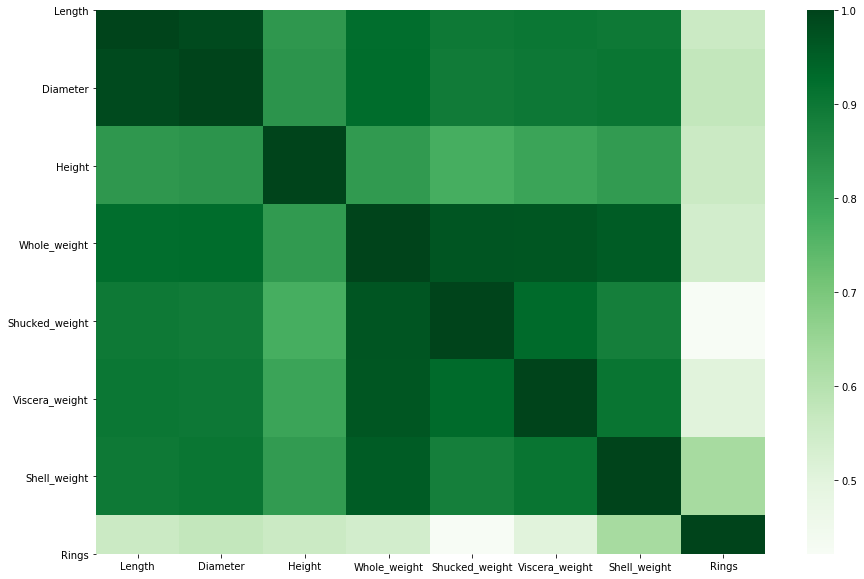

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=False, cmap=plt.cm.Greens)
plt.show()

In [15]:
results_all = dict()

## Finding the optimal neural network architecture

### MODEL 1 using Normalization (α = 0.2, hidden layer sizes = (9, 8, 1))

c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


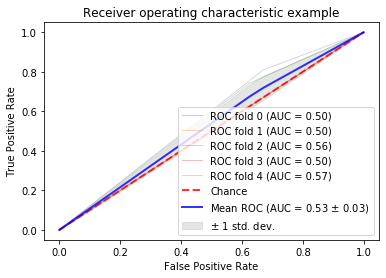

[[184, 1123], [137, 1391]]
Accuracy:  0.588339222614841
F1:  0.6795048143053646
MCC:  0.15947852711867083


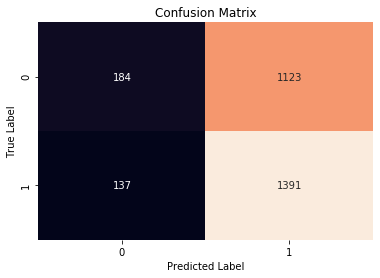

In [16]:
skf = StratifiedKFold(n_splits=5)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
acc = []
f1 = []
mcc = []
cm = []
i = 0

for trainIndex, textIndex in skf.split(XNorm, yDummy):
    xTrain, xTest = XNorm.iloc[trainIndex], XNorm.iloc[textIndex]
    yTrain, yTest = yDummy.iloc[trainIndex], yDummy.iloc[textIndex]
    
    clf1 = MLPClassifier(solver='lbfgs', alpha=.2,hidden_layer_sizes=(9,8,1))                              
    clf1.fit(xTrain, yTrain.values.ravel())  
    
    yPred = clf1.predict(xTest)
    
    # All Scores
    acc.append(accuracy_score(yTest, yPred))     # Accuracy
    f1.append(f1_score(yPred,yTest))             # F1 Scores
    mcc.append(matthews_corrcoef(yTest, yPred))  # Matthew Correlation Coefficient
    cm.append(confusion_matrix(yTest,yPred))     # Confusion Matrix
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
    
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    
   
# # print(cm)
# print(cm[0])
tp = fp = fn = tn = 0
for m in cm:
    tp += m[0][0]
    fp += m[0][1]
    
    fn += m[1][0]
    tn += m[1][1]
    
# print(tp, fp, fn, tn)
finalCM = [[tp, fp], [fn, tn]]

print(finalCM)
ax = sns.heatmap(finalCM, annot=True, cbar=False, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
    
print("Accuracy: ", accuracy_score(yTest, yPred))

# F1
print("F1: ", f1_score(yPred,yTest))

# MCC
print("MCC: ", matthews_corrcoef(yTest, yPred))
result = {'alpha':0.2, 'Hidden_layer_sizes': (9, 8, 1), 'Scaling_technique': 'Normalization', 'Mean_ROC': 0.51, 'Accuracy': accuracy_score(yTest, yPred), 'F1': f1_score(yPred,yTest), 'MCC': matthews_corrcoef(yTest, yPred)}
results_all['Model1'] = result

### MODEL 2 using MinMax (α = 0.2, hidden layer sizes = (9, 8, 1))

c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


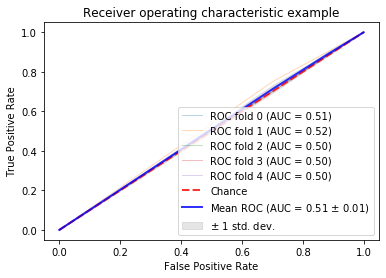

[[108, 1199], [107, 1421]]
Accuracy:  0.5388692579505301
F1:  0.7003444316877153
MCC:  0.0


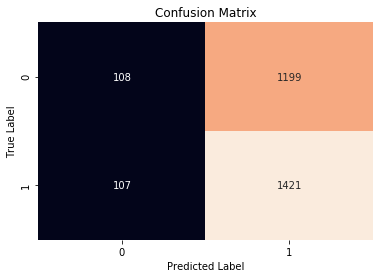

In [17]:
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
acc = []
f1 = []
mcc = []
cm = []
i = 0

for trainIndex, textIndex in skf.split(XNorm_minmax , yDummy):
    xTrain, xTest = XNorm_minmax.iloc[trainIndex], XNorm_minmax.iloc[textIndex]
    yTrain, yTest = yDummy.iloc[trainIndex], yDummy.iloc[textIndex]
    
    clf2 = MLPClassifier(solver='lbfgs', alpha=.2, hidden_layer_sizes=(9, 8, 1))
    clf2.fit(xTrain, yTrain.values.ravel())  
    
    yPred = clf2.predict(xTest)
    
    # All Scores
    acc.append(accuracy_score(yTest, yPred))     # Accuracy
    f1.append(f1_score(yPred,yTest))             # F1 Scores
    mcc.append(matthews_corrcoef(yTest, yPred))  # Matthew Correlation Coefficient
    cm.append(confusion_matrix(yTest,yPred))     # Confusion Matrix
    
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
    
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    
   
# # print(cm)
# print(cm[0])
tp = fp = fn = tn = 0
for m in cm:
    tp += m[0][0]
    fp += m[0][1]
    
    fn += m[1][0]
    tn += m[1][1]
    
# print(tp, fp, fn, tn)
finalCM = [[tp, fp], [fn, tn]]

# finalCMNormalized = finalCM.astype('float') / finalCM.sum(axis=1)[:, np.newaxis]

print(finalCM)
ax = sns.heatmap(finalCM, annot=True, cbar=False, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
    
print("Accuracy: ", accuracy_score(yTest, yPred))

# F1
print("F1: ", f1_score(yPred,yTest))

# MCC
print("MCC: ", matthews_corrcoef(yTest, yPred))
result = {'alpha':0.2, 'Hidden_layer_sizes': (9, 8, 1), 'Scaling_technique': 'MinMax', 'Mean_ROC': 0.51,'Accuracy': accuracy_score(yTest, yPred), 'F1': f1_score(yPred,yTest), 'MCC': matthews_corrcoef(yTest, yPred)}
results_all['Model2'] = result

### MODEL 3 using MinMax (α = 0.5, hidden layer sizes = (9, 8, 7, 6, 1))

c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


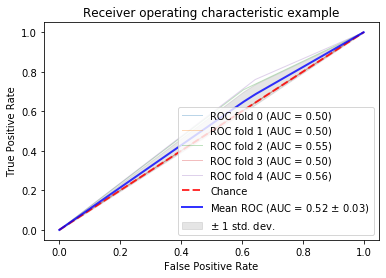

[[196, 1111], [162, 1366]]
Accuracy:  0.5742049469964664
F1:  0.6581560283687943
MCC:  0.12808219282106698


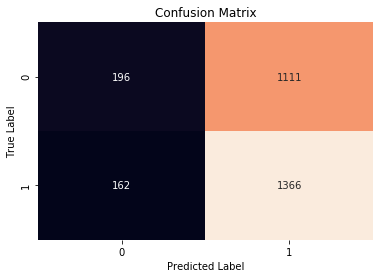

In [18]:
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
acc = []
f1 = []
mcc = []
cm = []
i = 0

for trainIndex, textIndex in skf.split(XNorm_minmax, yDummy):
    xTrain, xTest = XNorm_minmax.iloc[trainIndex], XNorm_minmax.iloc[textIndex]
    yTrain, yTest = yDummy.iloc[trainIndex], yDummy.iloc[textIndex]
    
    clf3 = MLPClassifier(solver='lbfgs', alpha=.5, hidden_layer_sizes=(9,8,7,6,1))
    clf3.fit(xTrain, yTrain.values.ravel())  
    
    yPred = clf3.predict(xTest)
    
    # All Scores
    acc.append(accuracy_score(yTest, yPred))     # Accuracy
    f1.append(f1_score(yPred,yTest))             # F1 Scores
    mcc.append(matthews_corrcoef(yTest, yPred))  # Matthew Correlation Coefficient
    cm.append(confusion_matrix(yTest,yPred))     # Confusion Matrix
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
    
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    
   
# # print(cm)
# print(cm[0])
tp = fp = fn = tn = 0
for m in cm:
    tp += m[0][0]
    fp += m[0][1]
    
    fn += m[1][0]
    tn += m[1][1]
    
# print(tp, fp, fn, tn)
finalCM = [[tp, fp], [fn, tn]]

print(finalCM)
ax = sns.heatmap(finalCM, annot=True, cbar=False, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print("Accuracy: ", accuracy_score(yTest, yPred))

# F1
print("F1: ", f1_score(yPred,yTest))

# MCC
print("MCC: ", matthews_corrcoef(yTest, yPred))   
result = {'alpha':0.5, 'Hidden_layer_sizes': (9, 8, 7, 6, 1), 'Scaling_technique': 'Normalization','Mean_ROC': 0.51, 'Accuracy': accuracy_score(yTest, yPred), 'F1': f1_score(yPred,yTest), 'MCC': matthews_corrcoef(yTest, yPred)}
results_all['Model3'] = result

### MODEL 4 using MinMax (α = 0.0001, hidden layer sizes = (9, 8, 1))

c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-p

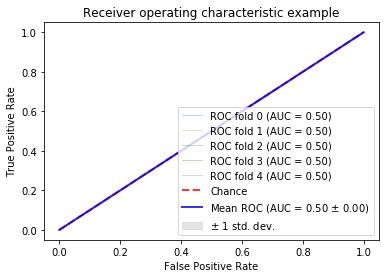

[[0, 1307], [0, 1528]]
Accuracy:  0.5388692579505301
F1:  0.7003444316877153
MCC:  0.0


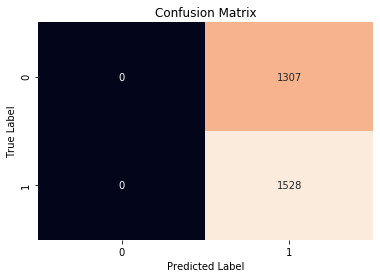

In [19]:
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
acc = []
f1 = []
mcc = []
cm = []
i = 0

for trainIndex, textIndex in skf.split(XNorm_minmax, yDummy):
    xTrain, xTest = XNorm_minmax.iloc[trainIndex], XNorm_minmax.iloc[textIndex]
    yTrain, yTest = yDummy.iloc[trainIndex], yDummy.iloc[textIndex]
    
    clf4 = MLPClassifier(solver='lbfgs', alpha=.0001, hidden_layer_sizes=(9,8,1))
    clf4.fit(xTrain, yTrain.values.ravel())  
    
    yPred = clf4.predict(xTest)
    
    # All Scores
    acc.append(accuracy_score(yTest, yPred))     # Accuracy
    f1.append(f1_score(yPred,yTest))             # F1 Scores
    mcc.append(matthews_corrcoef(yTest, yPred))  # Matthew Correlation Coefficient
    cm.append(confusion_matrix(yTest,yPred))     # Confusion Matrix
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
    
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    
   
# # print(cm)
# print(cm[0])
tp = fp = fn = tn = 0
for m in cm:
    tp += m[0][0]
    fp += m[0][1]
    
    fn += m[1][0]
    tn += m[1][1]
    
# print(tp, fp, fn, tn)
finalCM = [[tp, fp], [fn, tn]]

print(finalCM)
ax = sns.heatmap(finalCM, annot=True, cbar=False, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print("Accuracy: ", accuracy_score(yTest, yPred))

# F1
print("F1: ", f1_score(yPred,yTest))

# MCC
print("MCC: ", matthews_corrcoef(yTest, yPred))
result = {'alpha':0.0001, 'Hidden_layer_sizes': (9, 8, 1), 'Scaling_technique': 'MinMax','Mean_ROC': 0.51, 'Accuracy': accuracy_score(yTest, yPred), 'F1': f1_score(yPred,yTest), 'MCC': matthews_corrcoef(yTest, yPred)}
results_all['Model4'] = result

### MODEL 5 using MinMax (α = 0.2, hidden layer sizes = (9, 8, 8, 8, 1))

c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


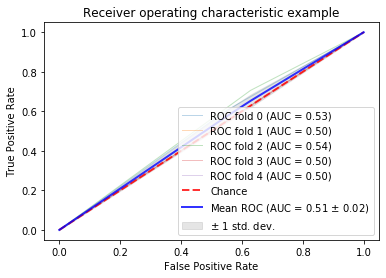

[[215, 1092], [211, 1317]]
Accuracy:  0.5388692579505301
F1:  0.7003444316877153
MCC:  0.0


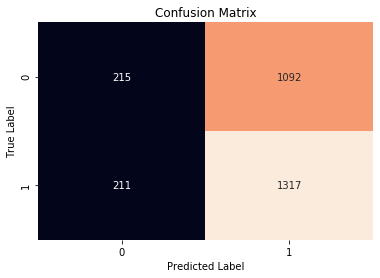

In [20]:
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
acc = []
f1 = []
mcc = []
cm = []
i = 0

for trainIndex, textIndex in skf.split(XNorm_minmax, yDummy):
    xTrain, xTest = XNorm_minmax.iloc[trainIndex], XNorm_minmax.iloc[textIndex]
    yTrain, yTest = yDummy.iloc[trainIndex], yDummy.iloc[textIndex]
    
    clf5 = MLPClassifier(solver='lbfgs', alpha=.2, hidden_layer_sizes=(9,8,8,8,1))
    clf5.fit(xTrain, yTrain.values.ravel())  
    
    yPred = clf5.predict(xTest)
    
    # All Scores
    acc.append(accuracy_score(yTest, yPred))     # Accuracy
    f1.append(f1_score(yPred,yTest))             # F1 Scores
    mcc.append(matthews_corrcoef(yTest, yPred))  # Matthew Correlation Coefficient
    cm.append(confusion_matrix(yTest,yPred))     # Confusion Matrix
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
    
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    
   
# # print(cm)
# print(cm[0])
tp = fp = fn = tn = 0
for m in cm:
    tp += m[0][0]
    fp += m[0][1]
    
    fn += m[1][0]
    tn += m[1][1]
    
# print(tp, fp, fn, tn)
finalCM = [[tp, fp], [fn, tn]]

print(finalCM)
ax = sns.heatmap(finalCM, annot=True, cbar=False, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print("Accuracy: ", accuracy_score(yTest, yPred))

# F1
print("F1: ", f1_score(yPred,yTest))

# MCC
print("MCC: ", matthews_corrcoef(yTest, yPred))
### MODEL 5 using MinMax (α = 0.2, hidden layer sizes = (9, 8, 8, 8, 1))
result = {'alpha':0.2, 'Hidden_layer_sizes': (9, 8, 8, 8, 1), 'Scaling_technique': 'MinMax','Mean_ROC': 0.53, 'Accuracy': accuracy_score(yTest, yPred), 'F1': f1_score(yPred,yTest), 'MCC': matthews_corrcoef(yTest, yPred)}
results_all['Model5'] = result

### MODEL 6 using MinMax (α = 0.2, hidden layer sizes = (8, 8, 8, 8, 1))

c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-p

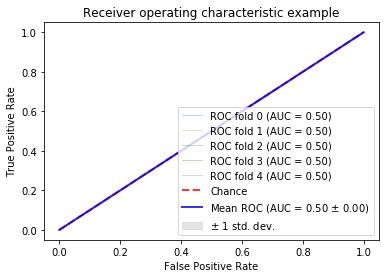

[[0, 1307], [0, 1528]]
Accuracy:  0.5388692579505301
F1:  0.7003444316877153
MCC:  0.0


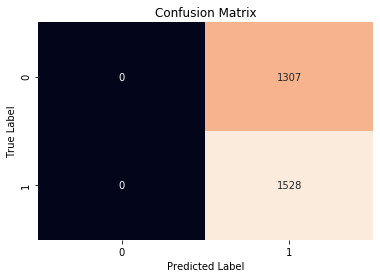

In [21]:
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
acc = []
f1 = []
mcc = []
cm = []
i = 0

for trainIndex, textIndex in skf.split(XNorm_minmax, yDummy):
    xTrain, xTest = XNorm_minmax.iloc[trainIndex], XNorm_minmax.iloc[textIndex]
    yTrain, yTest = yDummy.iloc[trainIndex], yDummy.iloc[textIndex]
    
    clf6 = MLPClassifier(solver='lbfgs', alpha=.2, hidden_layer_sizes=(8,8,8,8,1))
    clf6.fit(xTrain, yTrain.values.ravel())  
    
    yPred = clf6.predict(xTest)
    
    # All Scores
    acc.append(accuracy_score(yTest, yPred))     # Accuracy
    f1.append(f1_score(yPred,yTest))             # F1 Scores
    mcc.append(matthews_corrcoef(yTest, yPred))  # Matthew Correlation Coefficient
    cm.append(confusion_matrix(yTest,yPred))     # Confusion Matrix
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
    
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    
   
# # print(cm)
# print(cm[0])
tp = fp = fn = tn = 0
for m in cm:
    tp += m[0][0]
    fp += m[0][1]
    
    fn += m[1][0]
    tn += m[1][1]
    
# print(tp, fp, fn, tn)
finalCM = [[tp, fp], [fn, tn]]

print(finalCM)
ax = sns.heatmap(finalCM, annot=True, cbar=False, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print("Accuracy: ", accuracy_score(yTest, yPred))

# F1
print("F1: ", f1_score(yPred,yTest))

# MCC
print("MCC: ", matthews_corrcoef(yTest, yPred))
result = {'alpha':0.2, 'Hidden_layer_sizes': (8, 8, 8, 8, 1), 'Scaling_technique': 'MinMax', 'Mean_ROC': 0.50,'Accuracy': accuracy_score(yTest, yPred), 'F1': f1_score(yPred,yTest), 'MCC': matthews_corrcoef(yTest, yPred)}
results_all['Model6'] = result

### MODEL 7 using MinMax (α = 0.00002, hidden layer sizes = (8, 8, 8, 8, 1))

c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-p

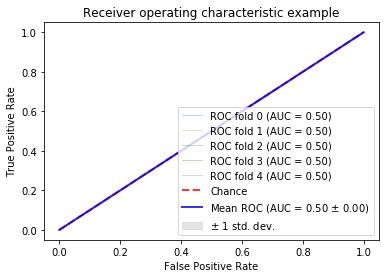

[[0, 1307], [0, 1528]]
Accuracy:  0.5388692579505301
F1:  0.7003444316877153
MCC:  0.0


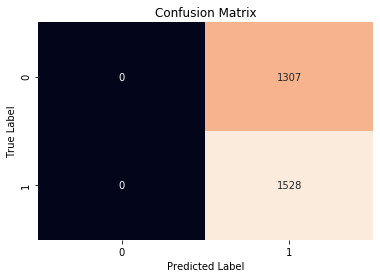

In [22]:
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
acc = []
f1 = []
mcc = []
cm = []
i = 0

for trainIndex, textIndex in skf.split(XNorm_minmax, yDummy):
    xTrain, xTest = XNorm_minmax.iloc[trainIndex], XNorm_minmax.iloc[textIndex]
    yTrain, yTest = yDummy.iloc[trainIndex], yDummy.iloc[textIndex]
    
    clf7 = MLPClassifier(solver='lbfgs', alpha=.00002, hidden_layer_sizes=(8,8,8,8,1))
    clf7.fit(xTrain, yTrain.values.ravel())  
    
    yPred = clf7.predict(xTest)
    
    # All Scores
    acc.append(accuracy_score(yTest, yPred))     # Accuracy
    f1.append(f1_score(yPred,yTest))             # F1 Scores
    mcc.append(matthews_corrcoef(yTest, yPred))  # Matthew Correlation Coefficient
    cm.append(confusion_matrix(yTest,yPred))     # Confusion Matrix
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
    
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    
   
# # print(cm)
# print(cm[0])
tp = fp = fn = tn = 0
for m in cm:
    tp += m[0][0]
    fp += m[0][1]
    
    fn += m[1][0]
    tn += m[1][1]
    
# print(tp, fp, fn, tn)
finalCM = [[tp, fp], [fn, tn]]

print(finalCM)
ax = sns.heatmap(finalCM, annot=True, cbar=False, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print("Accuracy: ", accuracy_score(yTest, yPred))

# F1
print("F1: ", f1_score(yPred,yTest))

# MCC
print("MCC: ", matthews_corrcoef(yTest, yPred))
result = {'alpha':0.00002, 'Hidden_layer_sizes': (8, 8, 8, 8, 1), 'Scaling_technique': 'MinMax', 'Mean_ROC': 0.52, 'Accuracy': accuracy_score(yTest, yPred), 'F1': f1_score(yPred,yTest), 'MCC': matthews_corrcoef(yTest, yPred)}
results_all['Model7'] = result

### MODEL 8 using MinMax (α = 0.2, hidden layer sizes = (9, 9, 9))

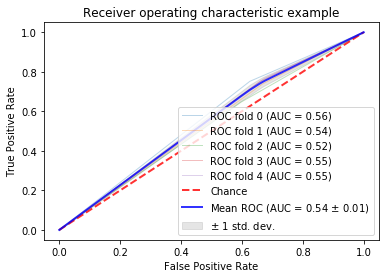

[[464, 843], [411, 1117]]
Accuracy:  0.5636042402826855
F1:  0.6545454545454545
MCC:  0.10362273370295119


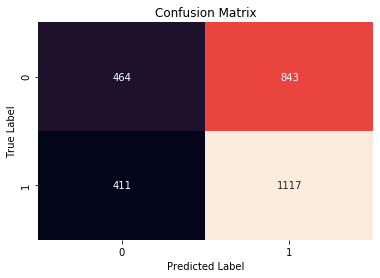

In [23]:
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
acc = []
f1 = []
mcc = []
cm = []
i = 0

for trainIndex, textIndex in skf.split(XNorm_minmax, yDummy):
    xTrain, xTest = XNorm_minmax.iloc[trainIndex], XNorm_minmax.iloc[textIndex]
    yTrain, yTest = yDummy.iloc[trainIndex], yDummy.iloc[textIndex]
    
    clf8 = MLPClassifier(solver='lbfgs', alpha=.2, hidden_layer_sizes=(9,9,9))
    clf8.fit(xTrain, yTrain.values.ravel())  
    
    yPred = clf8.predict(xTest)
    
    # All Scores
    acc.append(accuracy_score(yTest, yPred))     # Accuracy
    f1.append(f1_score(yPred,yTest))             # F1 Scores
    mcc.append(matthews_corrcoef(yTest, yPred))  # Matthew Correlation Coefficient
    cm.append(confusion_matrix(yTest,yPred))     # Confusion Matrix
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
    
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    
   
# # print(cm)
# print(cm[0])
tp = fp = fn = tn = 0
for m in cm:
    tp += m[0][0]
    fp += m[0][1]
    
    fn += m[1][0]
    tn += m[1][1]
    
# print(tp, fp, fn, tn)
finalCM = [[tp, fp], [fn, tn]]

print(finalCM)
ax = sns.heatmap(finalCM, annot=True, cbar=False, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print("Accuracy: ", accuracy_score(yTest, yPred))

# F1
print("F1: ", f1_score(yPred,yTest))

# MCC
print("MCC: ", matthews_corrcoef(yTest, yPred))
result = {'alpha':0.2, 'Hidden_layer_sizes': (9, 9, 9), 'Scaling_technique': 'MinMax','Mean_ROC': 0.53, 'Accuracy': accuracy_score(yTest, yPred), 'F1': f1_score(yPred,yTest), 'MCC': matthews_corrcoef(yTest, yPred)}
results_all['Model8'] = result

### MODEL 9 using MinMax (α = 0.6, hidden layer sizes = (9, 9, 9))

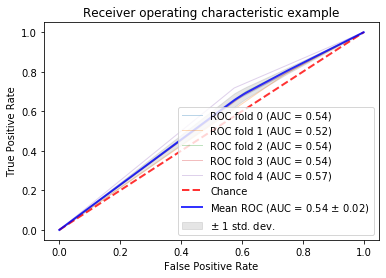

[[491, 816], [443, 1085]]
Accuracy:  0.5830388692579506
F1:  0.6498516320474778
MCC:  0.14997922690772839


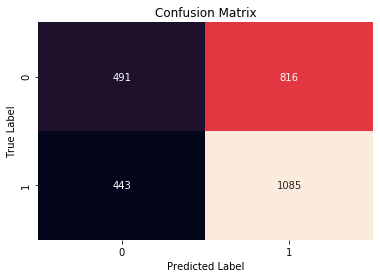

In [24]:
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
acc = []
f1 = []
mcc = []
cm = []
i = 0

for trainIndex, textIndex in skf.split(XNorm_minmax, yDummy):
    xTrain, xTest = XNorm_minmax.iloc[trainIndex], XNorm_minmax.iloc[textIndex]
    yTrain, yTest = yDummy.iloc[trainIndex], yDummy.iloc[textIndex]
    
    clf11 = MLPClassifier(solver='lbfgs', alpha=.6, hidden_layer_sizes=(9,9,9))
    clf11.fit(xTrain, yTrain.values.ravel())  
    
    yPred = clf11.predict(xTest)
    
    # All Scores
    acc.append(accuracy_score(yTest, yPred))     # Accuracy
    f1.append(f1_score(yPred,yTest))             # F1 Scores
    mcc.append(matthews_corrcoef(yTest, yPred))  # Matthew Correlation Coefficient
    cm.append(confusion_matrix(yTest,yPred))     # Confusion Matrix
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
    
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    
   
# # print(cm)
# print(cm[0])
tp = fp = fn = tn = 0
for m in cm:
    tp += m[0][0]
    fp += m[0][1]
    
    fn += m[1][0]
    tn += m[1][1]
    
# print(tp, fp, fn, tn)
finalCM = [[tp, fp], [fn, tn]]

print(finalCM)
ax = sns.heatmap(finalCM, annot=True, cbar=False, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print("Accuracy: ", accuracy_score(yTest, yPred))

# F1
print("F1: ", f1_score(yPred,yTest))

# MCC
print("MCC: ", matthews_corrcoef(yTest, yPred))
result = {'alpha':0.6, 'Hidden_layer_sizes': (9, 9, 9), 'Scaling_technique': 'MinMax','Mean_ROC': 0.54, 'Accuracy': accuracy_score(yTest, yPred), 'F1': f1_score(yPred,yTest), 'MCC': matthews_corrcoef(yTest, yPred)}
results_all['Model9'] = result

### MODEL 10 using MinMax (α = 0.001, hidden layer sizes = (9, 9, 9))

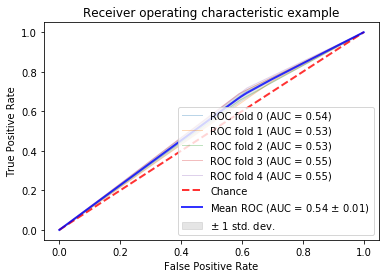

[[494, 813], [455, 1073]]
Accuracy:  0.5636042402826855
F1:  0.6394160583941605
MCC:  0.10737252878285353


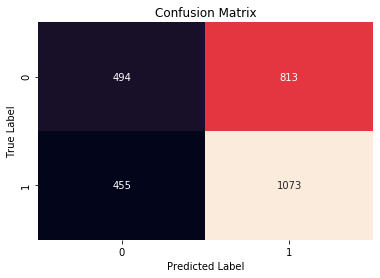

In [25]:
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
acc = []
f1 = []
mcc = []
cm = []
i = 0

for trainIndex, textIndex in skf.split(XNorm_minmax, yDummy):
    xTrain, xTest = XNorm_minmax.iloc[trainIndex], XNorm_minmax.iloc[textIndex]
    yTrain, yTest = yDummy.iloc[trainIndex], yDummy.iloc[textIndex]
    
    clf_b = MLPClassifier(solver='lbfgs', alpha=.0001, hidden_layer_sizes=(9,9,9))
    clf_b.fit(xTrain, yTrain.values.ravel())  
    
    yPred = clf_b.predict(xTest)
    
    # All Scores
    acc.append(accuracy_score(yTest, yPred))     # Accuracy
    f1.append(f1_score(yPred,yTest))             # F1 Scores
    mcc.append(matthews_corrcoef(yTest, yPred))  # Matthew Correlation Coefficient
    cm.append(confusion_matrix(yTest,yPred))     # Confusion Matrix
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
    
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    
   
# # print(cm)
# print(cm[0])
tp = fp = fn = tn = 0
for m in cm:
    tp += m[0][0]
    fp += m[0][1]
    
    fn += m[1][0]
    tn += m[1][1]
    
# print(tp, fp, fn, tn)
finalCM = [[tp, fp], [fn, tn]]

print(finalCM)
ax = sns.heatmap(finalCM, annot=True, cbar=False, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print("Accuracy: ", accuracy_score(yTest, yPred))

# F1
print("F1: ", f1_score(yPred,yTest))

# MCC
print("MCC: ", matthews_corrcoef(yTest, yPred))
result = {'alpha':0.001, 'Hidden_layer_sizes': (9, 9, 9), 'Scaling_technique': 'MinMax','Mean_ROC': 0.54, 'Accuracy': accuracy_score(yTest, yPred), 'F1': f1_score(yPred,yTest), 'MCC': matthews_corrcoef(yTest, yPred)}
results_all['Model10'] = result

### MODEL 11 using Normalization (α = 0.0001, hidden layer sizes = (9, 9, 9))

c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


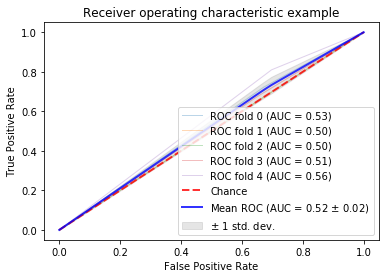

[[256, 1051], [242, 1286]]
Accuracy:  0.5759717314487632
F1:  0.673024523160763
MCC:  0.13094938743834864


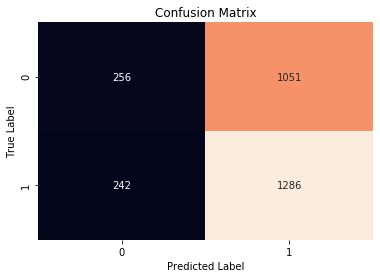

In [26]:
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
acc = []
f1 = []
mcc = []
cm = []
i = 0

for trainIndex, textIndex in skf.split(XNorm, yDummy):
    xTrain, xTest = XNorm.iloc[trainIndex], XNorm.iloc[textIndex]
    yTrain, yTest = yDummy.iloc[trainIndex], yDummy.iloc[textIndex]
    
    clf_n = MLPClassifier(solver='lbfgs', alpha=.0001, hidden_layer_sizes=(9,9,9))
    clf_n.fit(xTrain, yTrain.values.ravel())  
    
    yPred = clf_n.predict(xTest)
    
    # All Scores
    acc.append(accuracy_score(yTest, yPred))     # Accuracy
    f1.append(f1_score(yPred,yTest))             # F1 Scores
    mcc.append(matthews_corrcoef(yTest, yPred))  # Matthew Correlation Coefficient
    cm.append(confusion_matrix(yTest,yPred))     # Confusion Matrix
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
    
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    
   
# # print(cm)
# print(cm[0])
tp = fp = fn = tn = 0
for m in cm:
    tp += m[0][0]
    fp += m[0][1]
    
    fn += m[1][0]
    tn += m[1][1]
    
# print(tp, fp, fn, tn)
finalCM = [[tp, fp], [fn, tn]]

print(finalCM)
ax = sns.heatmap(finalCM, annot=True, cbar=False, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print("Accuracy: ", accuracy_score(yTest, yPred))

# F1
print("F1: ", f1_score(yPred,yTest))

# MCC
print("MCC: ", matthews_corrcoef(yTest, yPred))
result = {'alpha':0.0001, 'Hidden_layer_sizes': (9, 9, 9), 'Scaling_technique': 'Normalization','Mean_ROC': 0.51, 'Accuracy': accuracy_score(yTest, yPred), 'F1': f1_score(yPred,yTest), 'MCC': matthews_corrcoef(yTest, yPred)}
results_all['Model11'] = result

### MODEL 12 using MinMax (α = 0.00000000002, hidden layer sizes = (9, 9, 9))

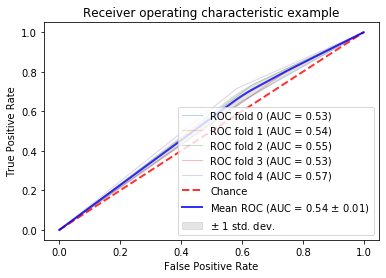

[[478, 829], [432, 1096]]
Accuracy:  0.5777385159010601
F1:  0.6459259259259259
MCC:  0.1386944629334446


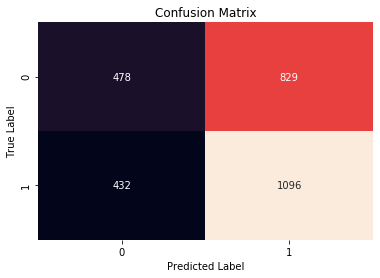

In [27]:
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
acc = []
f1 = []
mcc = []
cm = []
i = 0

for trainIndex, textIndex in skf.split(XNorm_minmax, yDummy):
    xTrain, xTest = XNorm_minmax.iloc[trainIndex], XNorm_minmax.iloc[textIndex]
    yTrain, yTest = yDummy.iloc[trainIndex], yDummy.iloc[textIndex]
    
    clf12 = MLPClassifier(solver='lbfgs', alpha=.00000000002, hidden_layer_sizes=(9,9,9))
    clf12.fit(xTrain, yTrain.values.ravel())  
    
    yPred = clf12.predict(xTest)
    
    # All Scores
    acc.append(accuracy_score(yTest, yPred))     # Accuracy
    f1.append(f1_score(yPred,yTest))             # F1 Scores
    mcc.append(matthews_corrcoef(yTest, yPred))  # Matthew Correlation Coefficient
    cm.append(confusion_matrix(yTest,yPred))     # Confusion Matrix
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
    
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    
   
# # print(cm)
# print(cm[0])
tp = fp = fn = tn = 0
for m in cm:
    tp += m[0][0]
    fp += m[0][1]
    
    fn += m[1][0]
    tn += m[1][1]
    
# print(tp, fp, fn, tn)
finalCM = [[tp, fp], [fn, tn]]

print(finalCM)
ax = sns.heatmap(finalCM, annot=True, cbar=False, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print("Accuracy: ", accuracy_score(yTest, yPred))

# F1
print("F1: ", f1_score(yPred,yTest))

# MCC
print("MCC: ", matthews_corrcoef(yTest, yPred))
result = {'alpha':0.00000000002, 'Hidden_layer_sizes': (9, 9, 9), 'Scaling_technique': 'MinMax', 'Mean_ROC': 0.53,'Accuracy': accuracy_score(yTest, yPred), 'F1': f1_score(yPred,yTest), 'MCC': matthews_corrcoef(yTest, yPred)}
results_all['Model12'] = result

### MODEL 13 using MinMax (α = 0.000002, hidden layer sizes = (8, 8, 9))

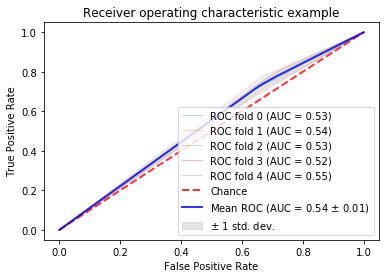

[[439, 868], [401, 1127]]
Accuracy:  0.5706713780918727
F1:  0.6601398601398601
MCC:  0.11948707432396022


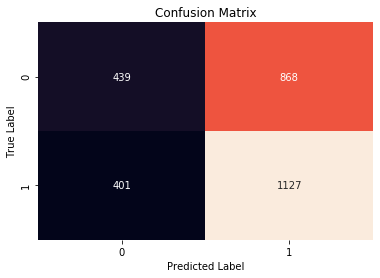

In [28]:
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
acc = []
f1 = []
mcc = []
cm = []
i = 0

for trainIndex, textIndex in skf.split(XNorm_minmax, yDummy):
    xTrain, xTest = XNorm_minmax.iloc[trainIndex], XNorm_minmax.iloc[textIndex]
    yTrain, yTest = yDummy.iloc[trainIndex], yDummy.iloc[textIndex]
    
    clf13 = MLPClassifier(solver='lbfgs', alpha=.000002, hidden_layer_sizes=(8,8,8))
    clf13.fit(xTrain, yTrain.values.ravel())  
    
    yPred = clf13.predict(xTest)
    
    # All Scores
    acc.append(accuracy_score(yTest, yPred))     # Accuracy
    f1.append(f1_score(yPred,yTest))             # F1 Scores
    mcc.append(matthews_corrcoef(yTest, yPred))  # Matthew Correlation Coefficient
    cm.append(confusion_matrix(yTest,yPred))     # Confusion Matrix
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
    
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    
   
# # print(cm)
# print(cm[0])
tp = fp = fn = tn = 0
for m in cm:
    tp += m[0][0]
    fp += m[0][1]
    
    fn += m[1][0]
    tn += m[1][1]
    
# print(tp, fp, fn, tn)
finalCM = [[tp, fp], [fn, tn]]

print(finalCM)
ax = sns.heatmap(finalCM, annot=True, cbar=False, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print("Accuracy: ", accuracy_score(yTest, yPred))

# F1
print("F1: ", f1_score(yPred,yTest))

# MCC
print("MCC: ", matthews_corrcoef(yTest, yPred))
result = {'alpha':0.000002, 'Hidden_layer_sizes': (8, 8, 9), 'Scaling_technique': 'MinMax', 'Mean_ROC': 0.52,'Accuracy': accuracy_score(yTest, yPred), 'F1': f1_score(yPred,yTest), 'MCC': matthews_corrcoef(yTest, yPred)}
results_all['Model13'] = result

In [29]:
pd.DataFrame.from_dict(results_all)

Model1     Model2           Model3     Model4  \
alpha                         0.2        0.2              0.5     0.0001   
Hidden_layer_sizes      (9, 8, 1)  (9, 8, 1)  (9, 8, 7, 6, 1)  (9, 8, 1)   
Scaling_technique   Normalization     MinMax    Normalization     MinMax   
Mean_ROC                     0.51       0.51             0.51       0.51   
Accuracy                 0.588339   0.538869         0.574205   0.538869   
F1                       0.679505   0.700344         0.658156   0.700344   
MCC                      0.159479          0         0.128082          0   

                             Model5           Model6           Model7  \
alpha                           0.2              0.2            2e-05   
Hidden_layer_sizes  (9, 8, 8, 8, 1)  (8, 8, 8, 8, 1)  (8, 8, 8, 8, 1)   
Scaling_technique            MinMax           MinMax           MinMax   
Mean_ROC                       0.53              0.5             0.52   
Accuracy                   0.538869         0.538869         0.538869   
F1                         0.700344         0.700344         0.700344   
MCC                               0                0                0   

                       Model8     Model9    Model10        Model11    Model12  \
alpha                     0.2        0.6      0.001         0.0001      2e-11   
Hidden_layer_sizes  (9, 9, 9)  (9, 9, 9)  (9, 9, 9)      (9, 9, 9)  (9, 9, 9)   
Scaling_technique      MinMax     MinMax     MinMax  Normalization     MinMax   
Mean_ROC                 0.53       0.54       0.54           0.51       0.53   
Accuracy             0.563604   0.583039   0.563604       0.575972   0.577739   
F1                   0.654545   0.649852   0.639416       0.673025   0.645926   
MCC                  0.103623   0.149979   0.107373       0.130949   0.138694   

                      Model13  
alpha                   2e-06  
Hidden_layer_sizes  (8, 8, 9)  
Scaling_technique      MinMax  
Mean_ROC                 0.52  
Accuracy             0.570671  
F1                    0.66014  
MCC                  0.119487